In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [171]:
#df = pd.read_csv('https://zenodo.org/record/7394851/files/MN-DS-news-classification.csv?download=1')

In [172]:
#os.makedirs('data',exist_ok=True)
#df.to_csv('data/news_dataset.csv', index=False)

In [173]:
df = pd.read_csv('data/news_dataset.csv')

In [174]:
df.head()

,data_id,id,date,source,title,content,author,url,published,published_utc,collection_utc,category_level_1,category_level_2
0,1809,abcnews--2019-10-31--Virginia mom charged with...,2019-10-31,abcnews,Virginia mom charged with murder in 2-year-old...,The Virginia woman whose 2-year-old son was fo...,NaN,https://abcnews.go.com/US/wireStory/virginia-m...,"Thu, 31 Oct 2019 16:49:56 -0400",1572554996,1572559512,"crime, law and justice",crime
1,1980,abcnews--2019-11-07--2 escaped murder suspects...,2019-11-07,abcnews,2 escaped murder suspects arrested at US-Mexic...,Authorities are trying to determine if anyone ...,NaN,https://abcnews.go.com/US/wireStory/escaped-mu...,"Thu, 07 Nov 2019 00:13:12 -0500",1573103592,1573131986,"crime, law and justice",crime
2,1995,abcnews--2019-11-07--Family turns in escaped b...,2019-11-07,abcnews,"Family turns in escaped boy, 13, suspected in ...",A 13-year-old suspect in a double homicide who...,NaN,https://abcnews.go.com/US/wireStory/family-tur...,"Thu, 07 Nov 2019 07:39:54 -0500",1573130394,1573131982,"crime, law and justice",crime
3,2740,abcnews--2019-12-02--Mother charged with murde...,2019-12-02,abcnews,Mother charged with murder in deaths of 2 youn...,The mother of two young children found hanging...,NaN,https://abcnews.go.com/US/wireStory/mother-cha...,"Mon, 02 Dec 2019 11:30:59 -0500",1575304259,1575308811,"crime, law and justice",crime
4,7038,ageofautism--2019-04-12--Physician Father and ...,2019-04-12,ageofautism,"Physician, Father and Caretaker of 29 Year Old...","""One family member said Derek “can be violent ...",Age of Autism,http://feedproxy.google.com/~r/ageofautism/~3/...,2019-04-12 09:00:00+00:00,1555074000,1567543083,"crime, law and justice",crime


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10917 entries, 0 to 10916
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   data_id           10917 non-null  int64 
 1   id                10917 non-null  object
 2   date              10917 non-null  object
 3   source            10917 non-null  object
 4   title             10917 non-null  object
 5   content           10917 non-null  object
 6   author            7605 non-null   object
 7   url               10917 non-null  object
 8   published         10917 non-null  object
 9   published_utc     10917 non-null  int64 
 10  collection_utc    10917 non-null  int64 
 11  category_level_1  10917 non-null  object
 12  category_level_2  10917 non-null  object
dtypes: int64(3), object(10)
memory usage: 1.1+ MB


## Feature selection for this model
- As we are working with recommendation system, we only need the `title` , `content` and `category_level_1`.
- So we will drop other columns.

In [176]:
columns_to_be_dropped = ['data_id','id','source','date','author','url','published','published_utc','collection_utc','category_level_2']
df = df.drop(columns_to_be_dropped,axis=1)
df.head()

,title,content,category_level_1
0,Virginia mom charged with murder in 2-year-old...,The Virginia woman whose 2-year-old son was fo...,"crime, law and justice"
1,2 escaped murder suspects arrested at US-Mexic...,Authorities are trying to determine if anyone ...,"crime, law and justice"
2,"Family turns in escaped boy, 13, suspected in ...",A 13-year-old suspect in a double homicide who...,"crime, law and justice"
3,Mother charged with murder in deaths of 2 youn...,The mother of two young children found hanging...,"crime, law and justice"
4,"Physician, Father and Caretaker of 29 Year Old...","""One family member said Derek “can be violent ...","crime, law and justice"


In [177]:
df.isnull().sum()

title               0
content             0
category_level_1    0
dtype: int64

In [178]:
df['category_level_1'].unique()

array(['crime, law and justice', 'arts, culture, entertainment and media',
       'economy, business and finance',
       'disaster, accident and emergency incident', 'environment',
       'education', 'health', 'human interest', 'lifestyle and leisure',
       'politics', 'labour', 'religion and belief',
       'science and technology', 'society', 'sport',
       'conflict, war and peace', 'weather'], dtype=object)

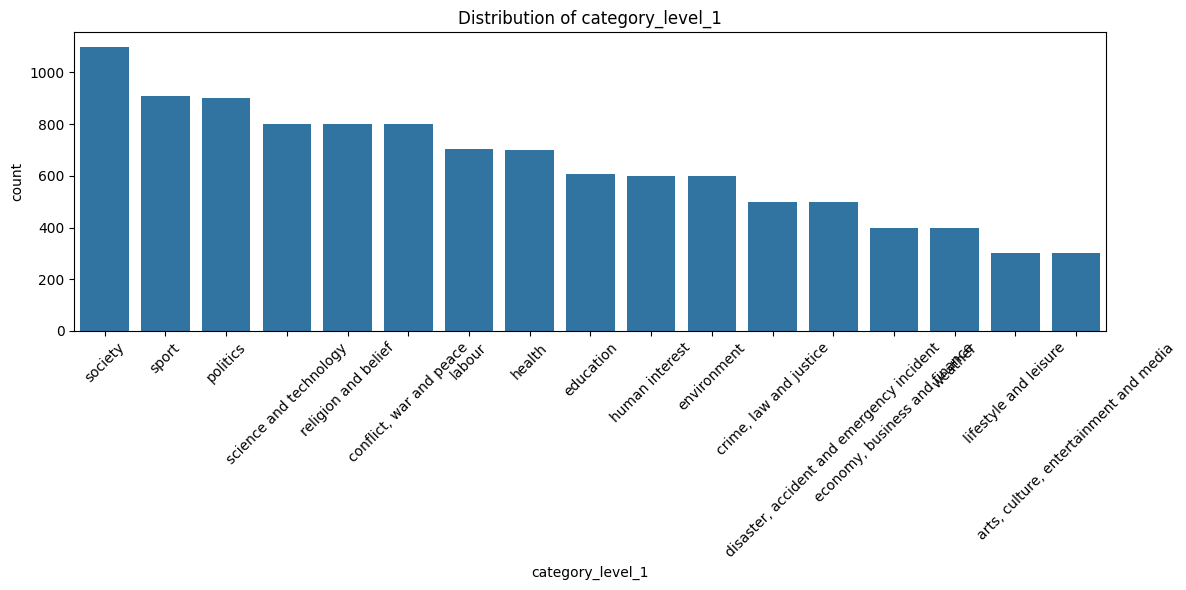

In [179]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='category_level_1', order=df['category_level_1'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of category_level_1')
plt.tight_layout()
plt.show()

In [180]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text) 
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words and len(word) > 2]
    return " ".join(tokens)

df['cleaned_text'] = df['content'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SURIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SURIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\SURIYA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [181]:
custom_stopwords = stop_words.union({"said", "year", "000", "com", "https", "he", "she","would","could",'uh', 'um', 'er', 'ah', 'like', 'okay', 'ok', 'right', 'well', 'hmm', 'sorta', 'kinda', 'youknow', 'actually', 'basically', 'literally', 'just', 'really',
    'is', 'am', 'are', 'was', 'were', 'be', 'been', 'being', 
    'have', 'has', 'had', 'do', 'does', 'did', 'doing', 
    'can', 'could', 'should', 'would', 'may', 'might', 'must', 'shall', 'will',
    'the', 'a', 'an', 'this', 'that', 'these', 'those',
    'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them',
    'my', 'your', 'his', 'its', 'our', 'their',
    'mine', 'yours', 'hers', 'ours', 'theirs',
    'and', 'or', 'but', 'if', 'because', 'so', 'while', 'although', 'though',
    'not', 'no', 'nor', 'only', 'very', 'too', 'also', 'even', 'than',
    'in', 'on', 'at', 'by', 'to', 'from', 'of', 'with', 'as', 'about', 'for', 'between', 'through', 'during', 'before', 'after', 'under', 'over', 'against', 'without', 'within', 'into', 'onto', 'upon',
    'zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten',
    'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen', 'sixteen', 'seventeen',
    'eighteen', 'nineteen', 'twenty', 'thirty', 'forty', 'fifty', 'sixty',
    'seventy', 'eighty', 'ninety', 'hundred', 'thousand', 'million', 'billion',
    'first', 'second', 'third', 'fourth', 'fifth', 'sixth', 'seventh',
    'eighth', 'ninth', 'tenth',
    'https', 'http', 'www', 'com', 'net', 'org', 'html', 'co', 'inc',
    'said', 'he', 'she', '000', 'year', 'new', 'old',})

In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer

def top_tfidf_words_per_category(df, category_col, text_col, top_n=15):
    tfidf_results = {}
    categories = df[category_col].unique()

    for category in categories:
        cat_df = df[df[category_col] == category]
        vectorizer = TfidfVectorizer(min_df=2, max_df=0.9, stop_words=list(custom_stopwords),max_features=5000)
        X = vectorizer.fit_transform(cat_df[text_col])
        
        tfidf_scores = X.sum(axis=0).A1
        vocab = vectorizer.get_feature_names_out()

        top_indices = tfidf_scores.argsort()[::-1][:top_n]
        top_words = [(vocab[i], tfidf_scores[i]) for i in top_indices]
        tfidf_results[category] = top_words

    return tfidf_results


In [183]:
tfidf_keywords = top_tfidf_words_per_category(df, 'category_level_1', 'cleaned_text')

In [184]:
for catgeory,words in tfidf_keywords.items():
    print(f"\n Top words in category {catgeory}")
    for word,score in words:
        print(f"{word}: {score:.3f}")


 Top words in category crime, law and justice
police: 21.006
law: 16.079
court: 12.667
state: 11.845
people: 11.519
officers: 9.649
government: 9.334
years: 8.996
enforcement: 8.989
federal: 8.840
death: 8.723
told: 8.620
house: 8.544
murder: 8.537
found: 8.149

 Top words in category arts, culture, entertainment and media
museum: 8.933
show: 7.870
news: 7.405
radio: 7.332
media: 7.012
people: 6.627
day: 6.292
entertainment: 5.810
art: 5.631
christmas: 5.349
royal: 5.099
trump: 4.839
live: 4.678
time: 4.675
culture: 4.454

 Top words in category economy, business and finance
oil: 19.342
economy: 12.916
economic: 11.508
trade: 11.400
growth: 10.575
trump: 10.165
market: 9.219
china: 8.998
percent: 8.846
government: 8.838
president: 8.407
global: 7.682
company: 7.304
deal: 7.100
last: 7.065

 Top words in category disaster, accident and emergency incident
police: 17.981
people: 16.068
road: 15.406
fire: 13.565
car: 11.745
crash: 11.233
emergency: 10.238
scene: 9.880
man: 9.200
died: 9.0

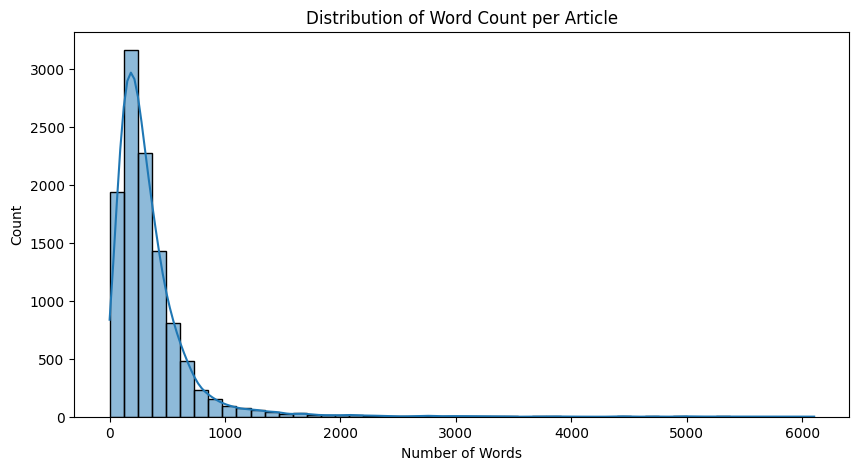

In [185]:
df['text_length'] = df['cleaned_text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10,5))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title("Distribution of Word Count per Article")
plt.xlabel("Number of Words")
plt.show()

In [186]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_bigrams_per_category(df, category_col, text_col, top_n=10):
    result = {}
    for category in df[category_col].unique():
        subset = df[df[category_col] == category]
        vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
        X = vectorizer.fit_transform(subset[text_col])
        
        bigram_counts = X.sum(axis=0).A1
        vocab = vectorizer.get_feature_names_out()
        freq_df = pd.DataFrame({'bigram': vocab, 'count': bigram_counts})
        top_bigrams = freq_df.sort_values(by='count', ascending=False).head(top_n)
        
        result[category] = top_bigrams
    return result


In [187]:
top_bigrams = get_top_bigrams_per_category(df, 'category_level_1', 'cleaned_text')
for category, bigrams in top_bigrams.items():
    print(f"\n🔹 Top bigrams for {category}:\n", bigrams)


🔹 Top bigrams for crime, law and justice:
                     bigram  count
65880      law enforcement    405
41827   facial recognition    124
78682              new law    112
8760      attorney general    111
78785             new york    110
88213      police officers    106
115881       supreme court     93
43473   federal government     86
88212       police officer     85
70335          los angeles     84

🔹 Top bigrams for arts, culture, entertainment and media:
                  bigram  count
45903          new york     60
8020     british museum     49
63628      social media     44
59132      royal family     42
53128     prince george     41
40704  mainstream media     39
41589        mass media     39
24034         fake news     38
5656          bbc radio     32
53130      prince harry     30

🔹 Top bigrams for economy, business and finance:
                  bigram  count
92411     united states    144
90019         trade war    117
26067   economic growth    112
32243 

In [ ]:
def compute_bigram_cooccurrence_optimized(df, category_col, text_col, top_n_bigrams=50):
    from sklearn.feature_extraction.text import CountVectorizer
    from scipy.sparse import csr_matrix
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt

    category_bigram_matrices = {}

    for category in df[category_col].unique():
        print(f"\n🔹 Processing category: {category}")
        texts = df[df[category_col] == category][text_col].dropna().tolist()

        vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=top_n_bigrams)
        X = vectorizer.fit_transform(texts)
        bigram_vocab = vectorizer.get_feature_names_out()

        X_bin = (X > 0).astype(int)

        co_matrix = (X_bin.T @ X_bin).toarray()
        np.fill_diagonal(co_matrix, 0)

        category_bigram_matrices[category] = (bigram_vocab, co_matrix)

        plt.figure(figsize=(10, 8))
        sns.heatmap(co_matrix, xticklabels=bigram_vocab, yticklabels=bigram_vocab,
                    cmap='Blues', annot=False, linewidths=0.5)
        plt.title(f'Bigram Co-occurrence Matrix: {category}')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

    return category_bigram_matrices


🔹 Processing category: crime, law and justice


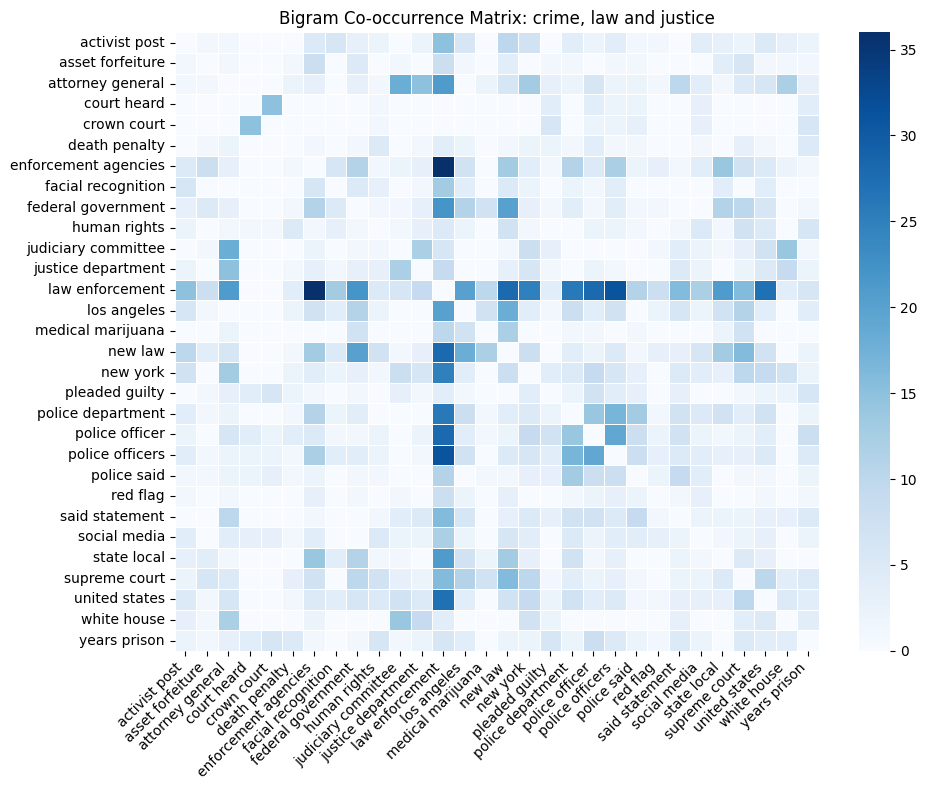


🔹 Processing category: arts, culture, entertainment and media


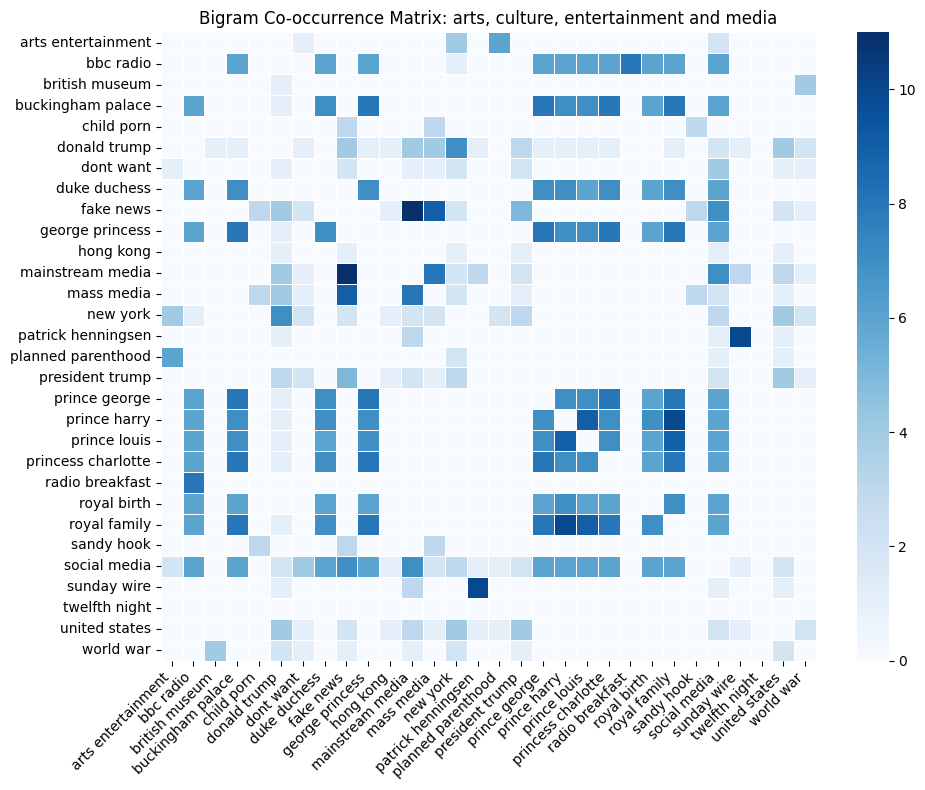


🔹 Processing category: economy, business and finance


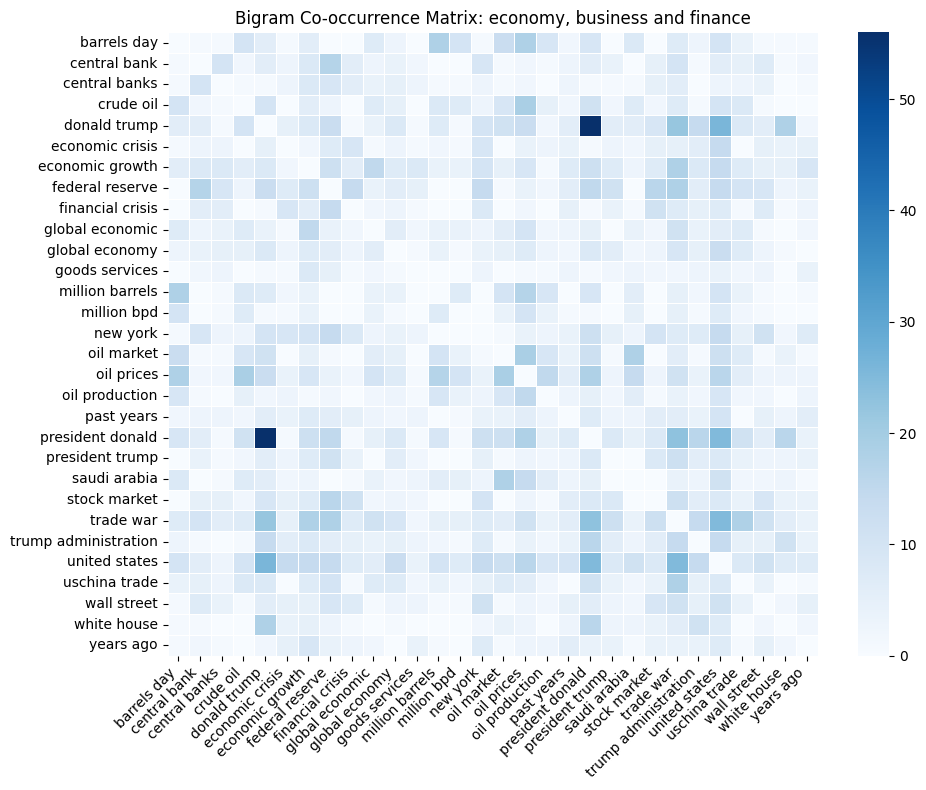


🔹 Processing category: disaster, accident and emergency incident


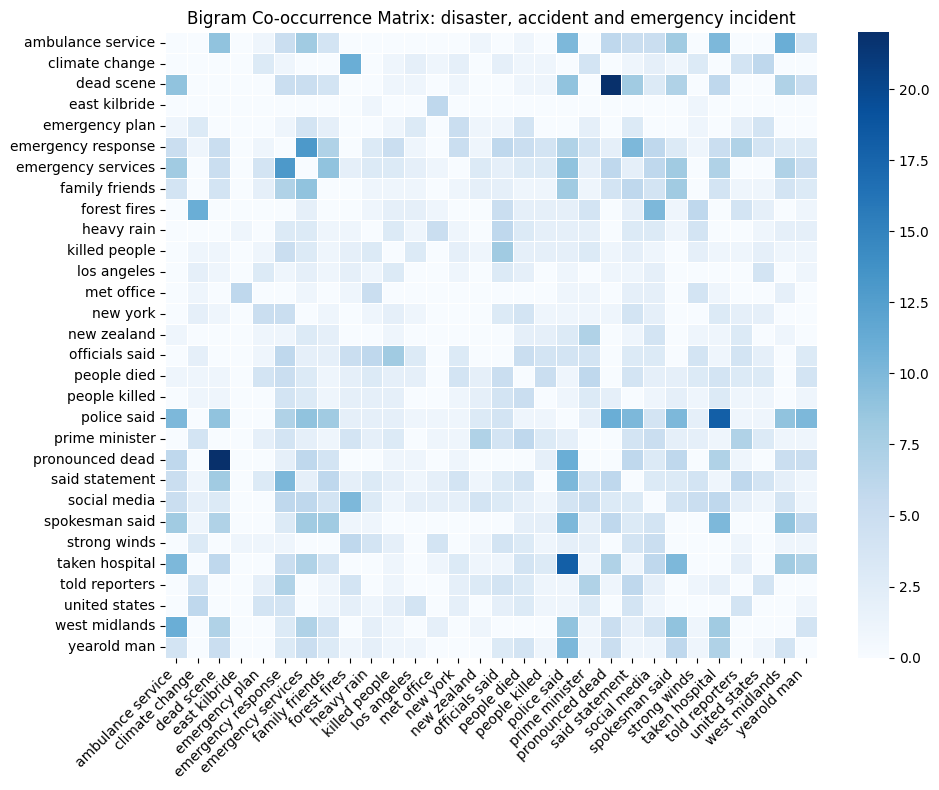


🔹 Processing category: environment


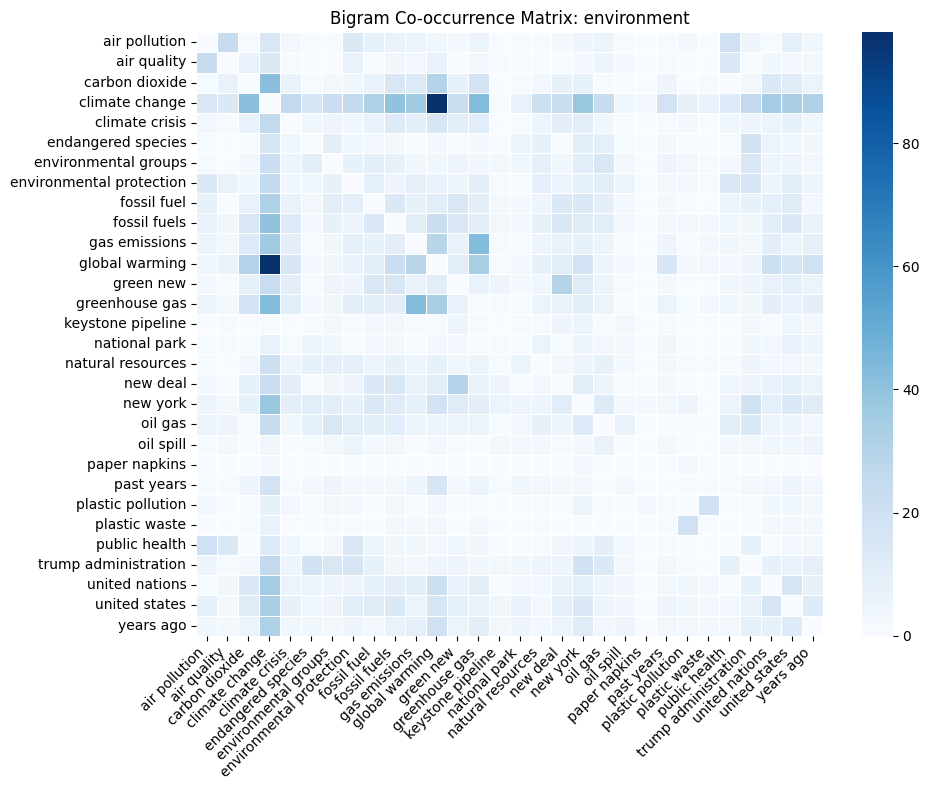


🔹 Processing category: education


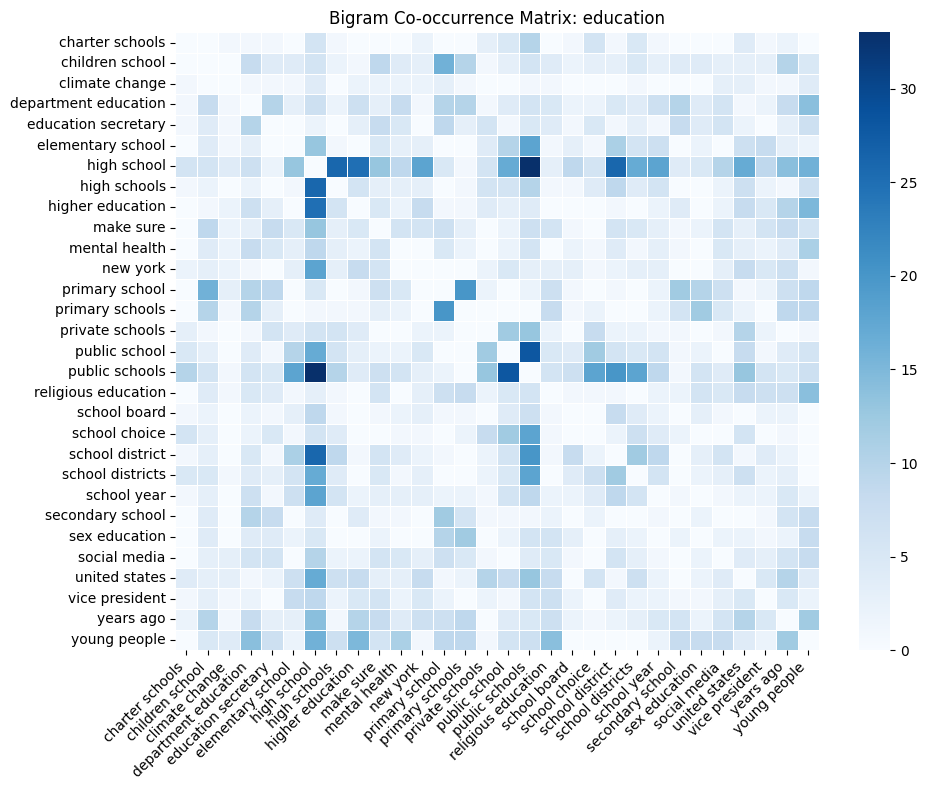


🔹 Processing category: health


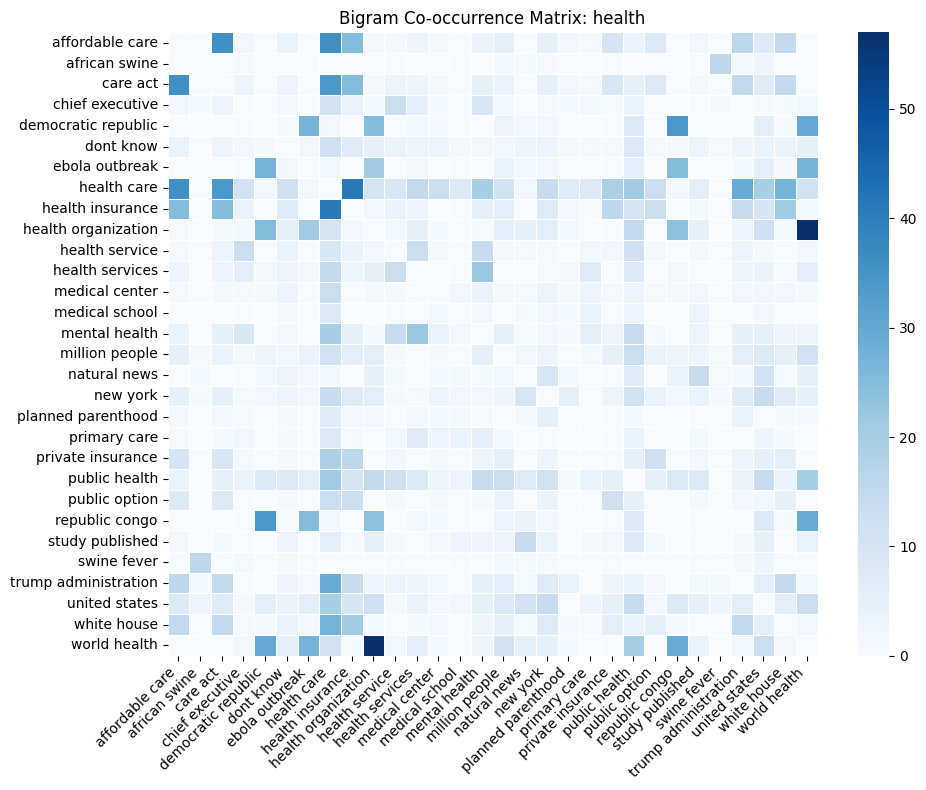


🔹 Processing category: human interest


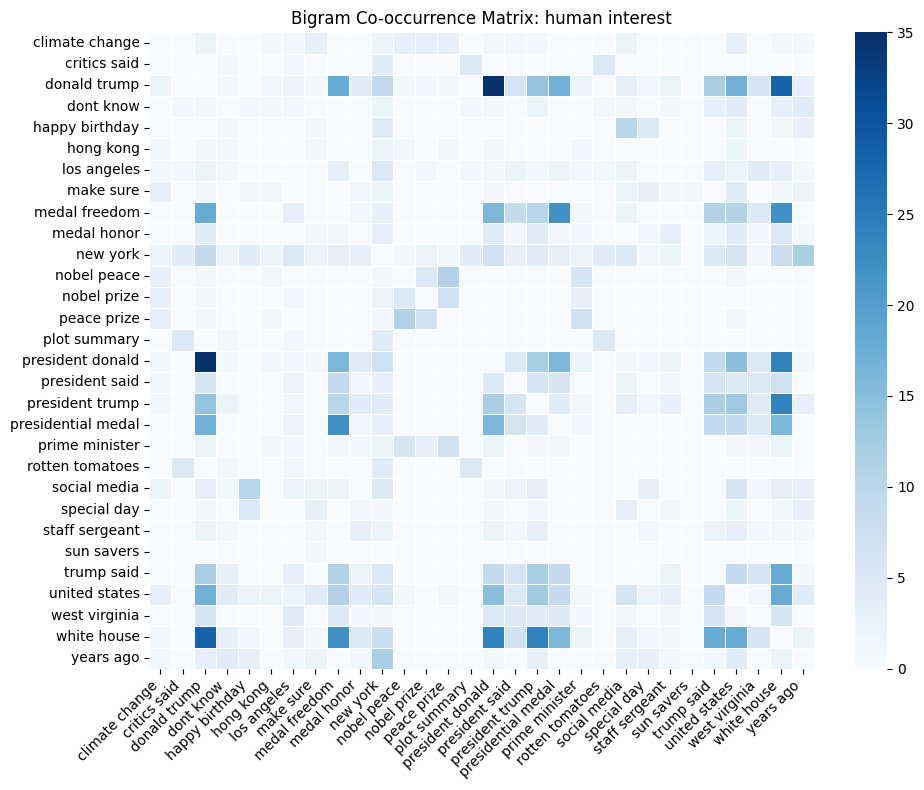


🔹 Processing category: lifestyle and leisure


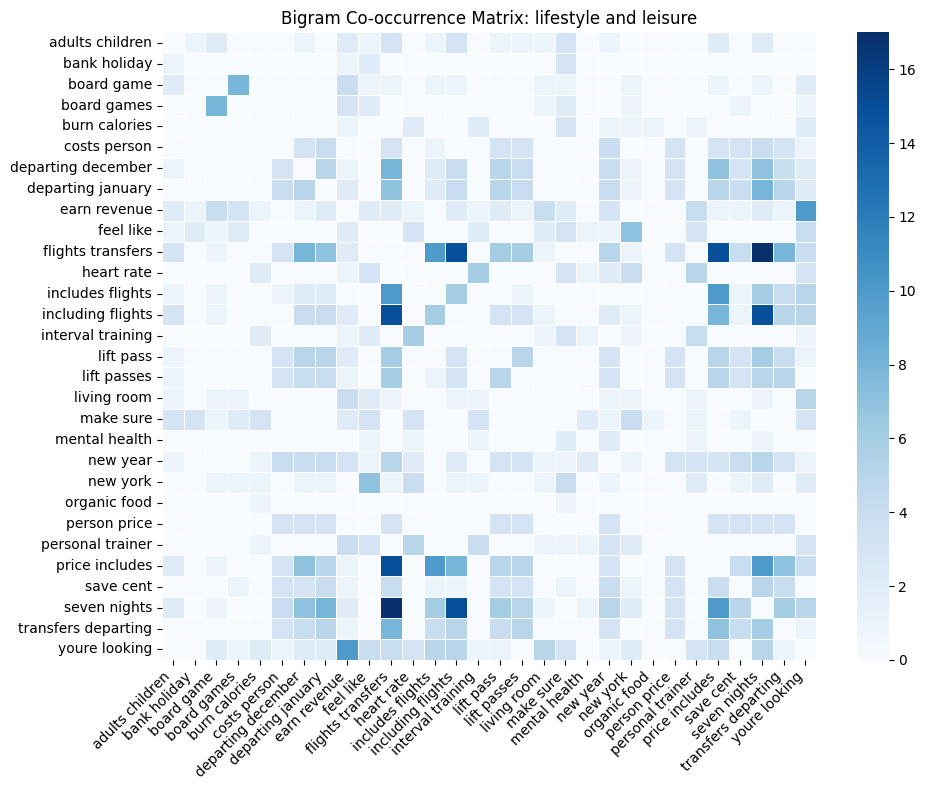


🔹 Processing category: politics


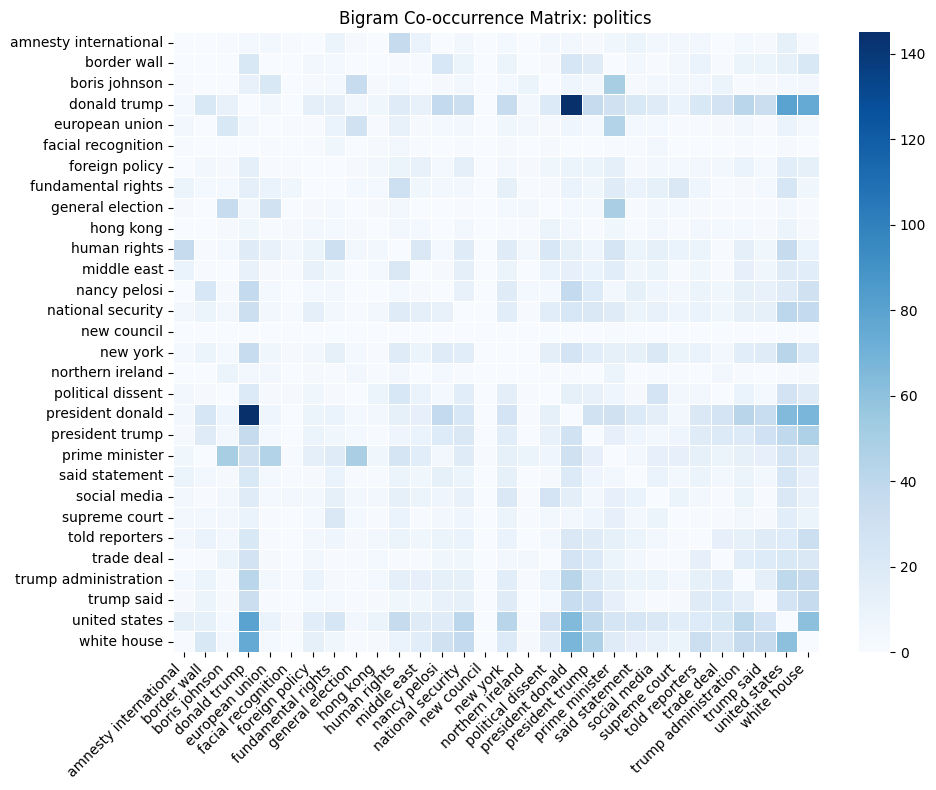


🔹 Processing category: labour


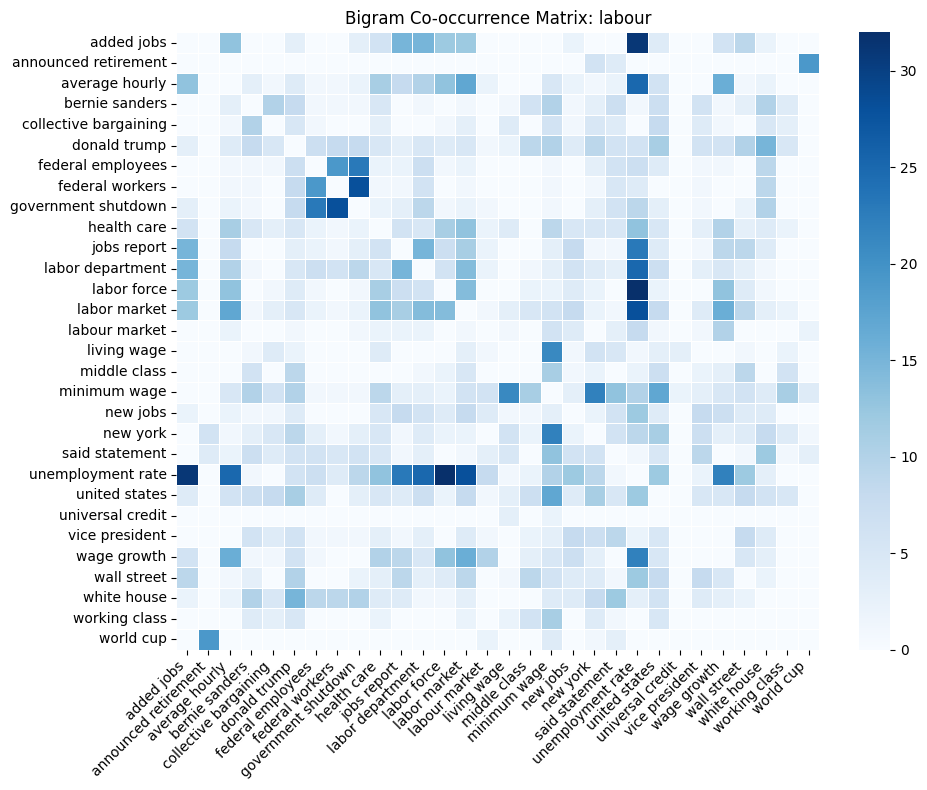


🔹 Processing category: religion and belief


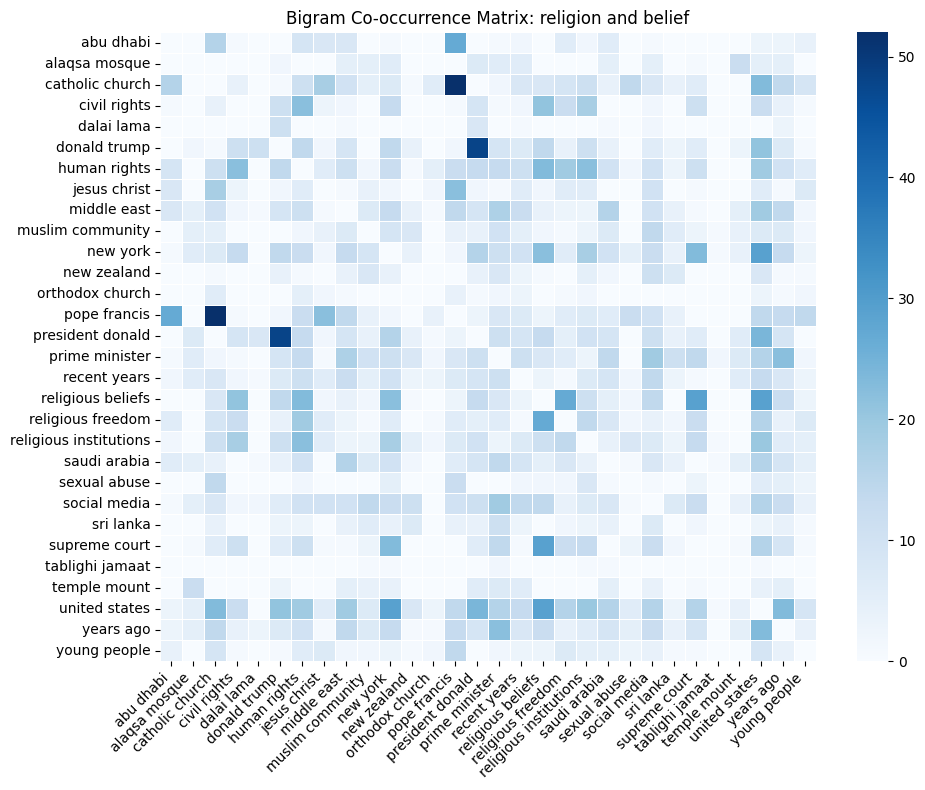


🔹 Processing category: science and technology


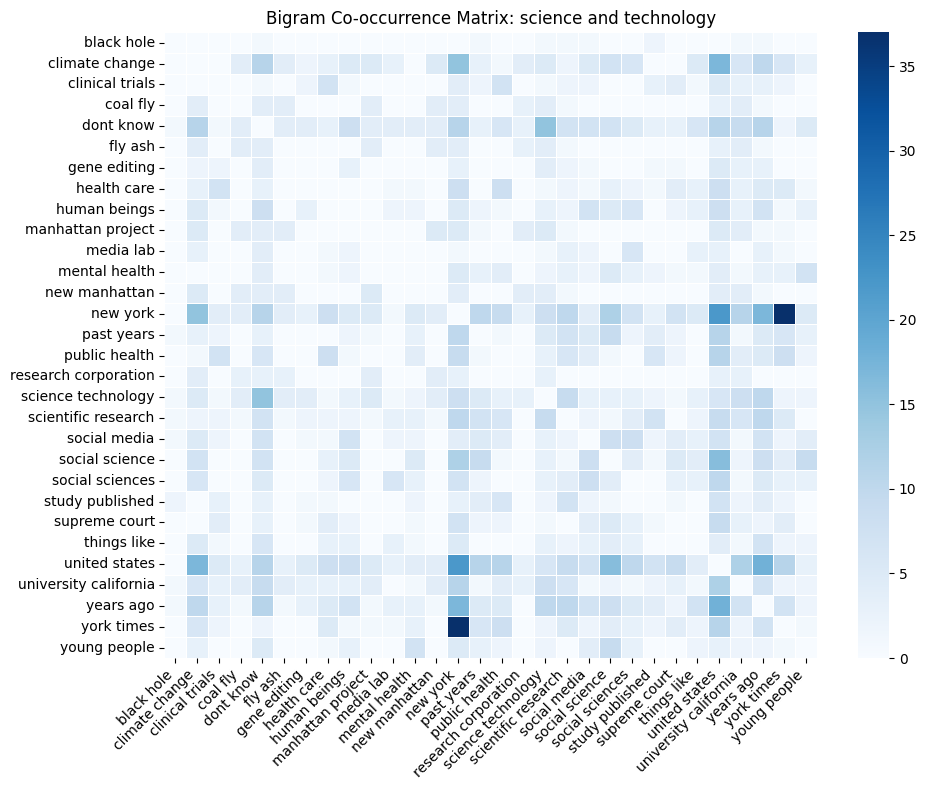


🔹 Processing category: society


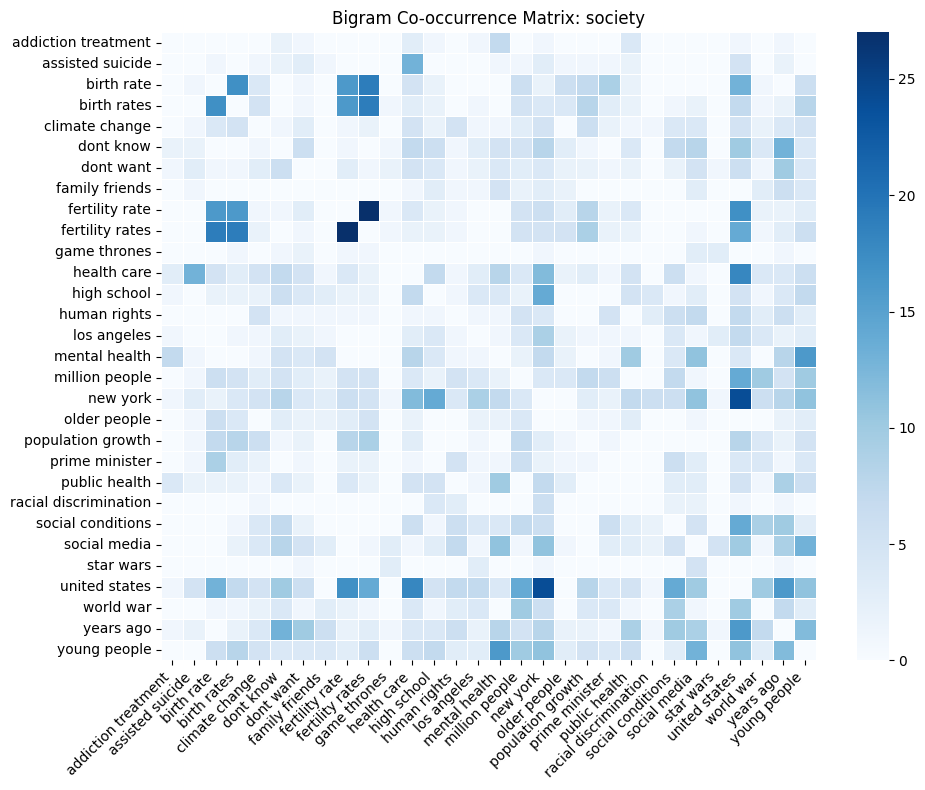


🔹 Processing category: sport


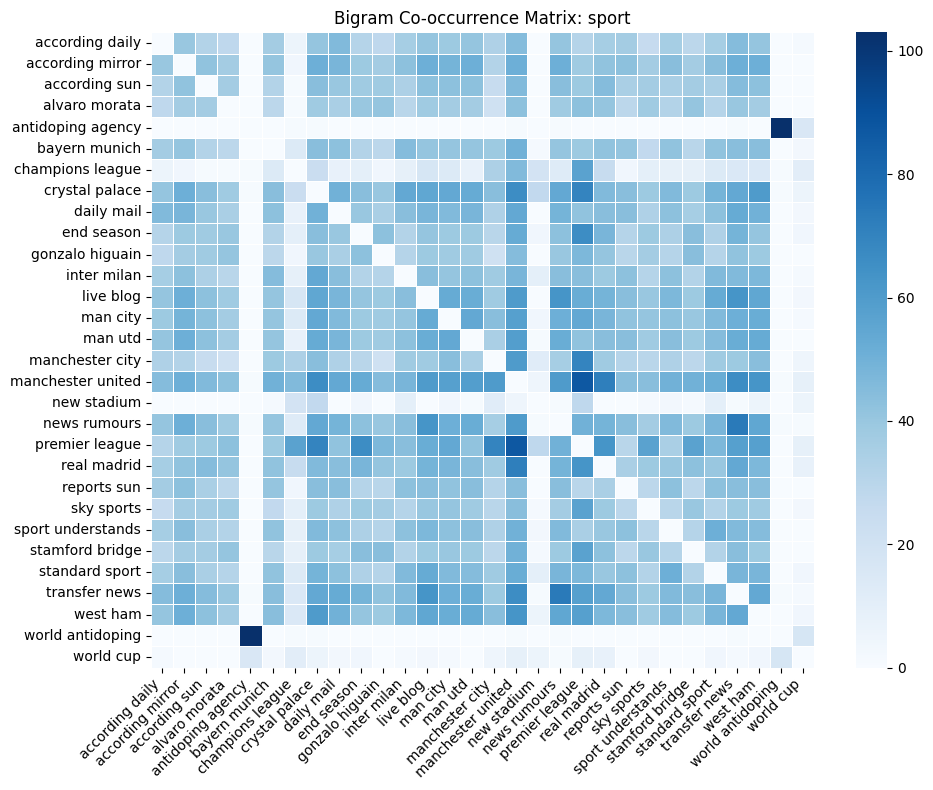


🔹 Processing category: conflict, war and peace


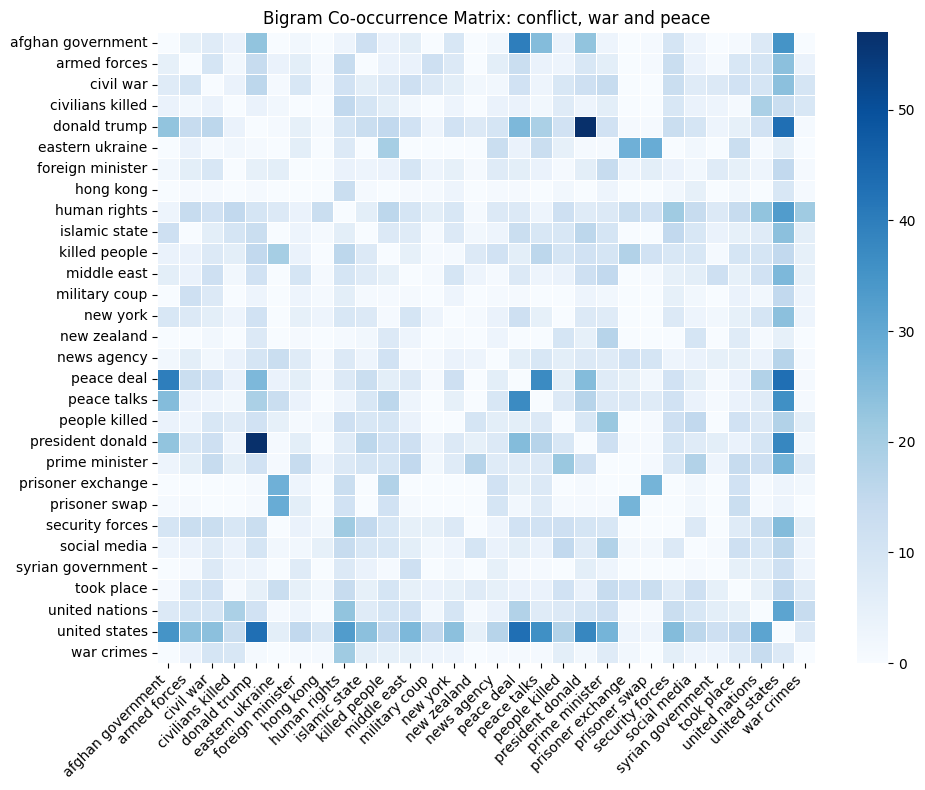


🔹 Processing category: weather


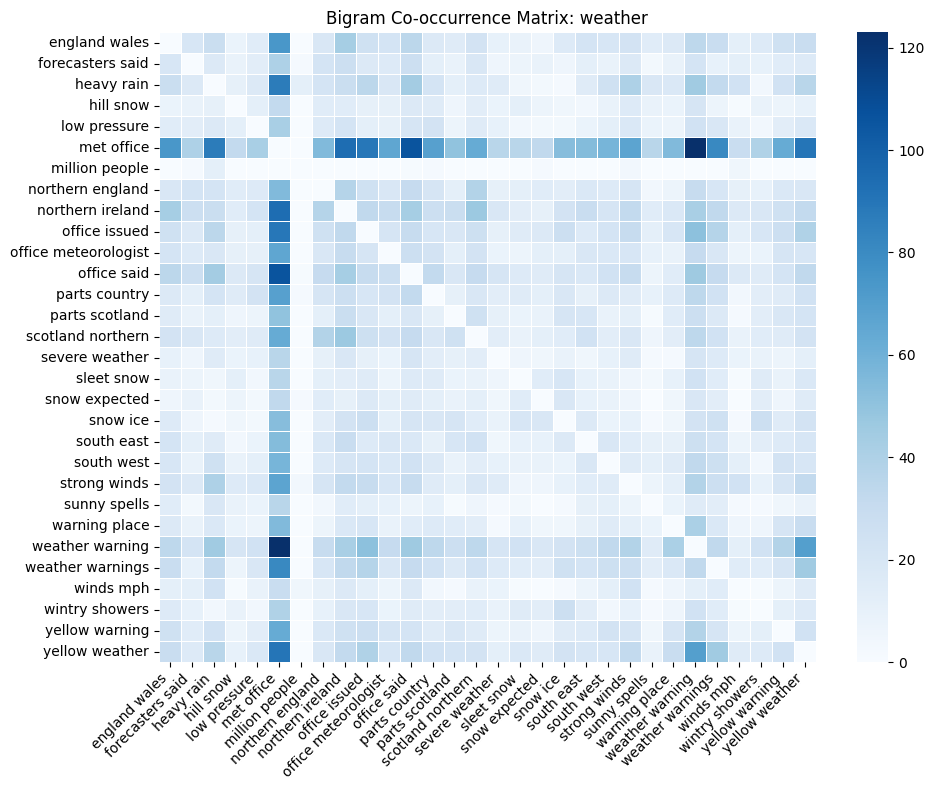

In [189]:
bigram_matrices = compute_bigram_cooccurrence_optimized(
    df,
    category_col='category_level_1',
    text_col='cleaned_text',
    top_n_bigrams=30
)
